In [1]:
# Imports
# Reference: https://www.youtube.com/watch?v=lTypMlVBFM4

from selenium import webdriver
import pandas as pd
from datetime import date
import time
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Forbes Billionaires:
url = "https://www.forbes.com/billionaires/"

In [3]:
# Open chrome browser
driver = webdriver.Chrome('C:\Program Files (x86)\chromedriver.exe')
driver.get(url)

# Maximize window:
driver.maximize_window()

In [4]:
# Test: scroll to near bottom for next 200 billionaires
#next_page = driver.find_element_by_xpath('//*[@id="gatsby-focus-wrapper"]/div/div/div[3]/div[2]/div[2]/div[2]/div[27]/div[7]/div[2]/button[2]')
#driver.execute_script("arguments[0].scrollIntoView();", next_page)
#driver.execute_script("window.scrollTo(window.scrollY, window.scrollY - 200)")

A for loop is needed to go through pages. Scrape page 1 which has top 200 billionaires then click on next page for the next billionaires for scraping then move through all the pages and scrape data. There are 14 pages of Billionaires to scrape.

Each page in Forbes Billionaires needs to be navigated with Selenium and button clicking. All 14 pages of billionaires is under the same URL link.

For obtaining the data, I use class names. 

In [5]:
# Initalize empty lists:
# Format of table is: Rank, Name, Net Worth, Age, Country/Territory, Source, Territory

rank_list = []
names_list = []
net_worth_list = []
age_list = []
country_list = []
source_list = []
industry_list = []

# Loop through each one of 14 pages, scrape each page and append data to the lists:
# This takes several minutes (5-7 minutes)

for i in range(1, 15):
    ## Scroll down page gradually:
    for j in range(75):
        driver.execute_script("window.scrollTo(window.scrollY, window.scrollY + 250)")
        time.sleep(0.1)
        
    ## Scrape data from the page:
    time.sleep(3)
    
    # Extract Rank
    rank = [x.text for x in driver.find_elements_by_class_name('rank')][1:]
    rank_list.append(rank)
    
    # Extract name and remove first element which is just NAME:
    name = [x.text for x in driver.find_elements_by_class_name('personName')][1:]
    names_list.append(name)
    
    # Extract total net worth and remove first element that says NET Worth:
    total_net_worth = [x.text for x in driver.find_elements_by_class_name('netWorth')][1:]
    net_worth_list.append(total_net_worth)
    
    # Extract age and remove first element that says AGE
    age = [x.text for x in driver.find_elements_by_class_name('age')][1:]
    age_list.append(age)
    
    # Extract country and remove first element that says COUNTRY / TERRITORY:
    country = [x.text for x in driver.find_elements_by_class_name('countryOfCitizenship')][1:]
    country_list.append(country)
    
    # Extract company/source and remove first element that says Source
    source = [x.text for x in driver.find_elements_by_class_name('source')][1:]
    source_list.append(source)
    
    # Extract Industry and remove first element that says Industry
    industry = [x.text for x in driver.find_elements_by_class_name('category')][1:]
    industry_list.append(industry)
    
    # Move out of loop and dont click next page
    if i == 14:
        break
    
    time.sleep(3)
    
    ## Navigate to next page button near bottom of page then click next page:
    next_page = driver.find_element_by_xpath('//*[@id="gatsby-focus-wrapper"]/div/div/div[3]/div[2]/div[2]/div[2]/div[27]/div[7]/div[2]/button[2]')
    driver.execute_script("arguments[0].scrollIntoView();", next_page)
    driver.execute_script("window.scrollTo(window.scrollY, window.scrollY - 200)")
    try:
        next_page.click()
    except:
        None

In [6]:
# Close driver:
driver.close()

In [7]:
# The lists (rank_list, names_list, etc) are lists of list, have to flatten them:
# https://stackoverflow.com/questions/952914/how-to-make-a-flat-list-out-of-a-list-of-lists
sum(names_list, [])[0:10]

['Jeff Bezos',
 'Elon Musk',
 'Bernard Arnault & family',
 'Bill Gates',
 'Mark Zuckerberg',
 'Warren Buffett',
 'Larry Ellison',
 'Larry Page',
 'Sergey Brin',
 'Mukesh Ambani']

In [8]:
# Fill list of Forbes Billionaires of 2021

billionaires_df = pd.DataFrame({
                                'Rank': sum(rank_list, []), 
                                'Name': sum(names_list, []), 
                                'Net Worth Billions USD': sum(net_worth_list, []),
                                'Age': sum(age_list, []),
                                'Country': sum(country_list, []),
                                'Source': sum(source_list, []),
                                'Industry': sum(industry_list, [])
})

In [9]:
# Preview top 10 billionaires acc to Forbes
billionaires_df.head(10)

,Rank,Name,Net Worth Billions USD,Age,Country,Source,Industry
0,1.,Jeff Bezos,$177 B,57,United States,Amazon,Technology
1,2.,Elon Musk,$151 B,49,United States,"Tesla, SpaceX",Automotive
2,3.,Bernard Arnault & family,$150 B,72,France,LVMH,Fashion & Retail
3,4.,Bill Gates,$124 B,65,United States,Microsoft,Technology
4,5.,Mark Zuckerberg,$97 B,36,United States,Facebook,Technology
5,6.,Warren Buffett,$96 B,90,United States,Berkshire Hathaway,Finance & Investments
6,7.,Larry Ellison,$93 B,76,United States,software,Technology
7,8.,Larry Page,$91.5 B,48,United States,Google,Technology
8,9.,Sergey Brin,$89 B,47,United States,Google,Technology
9,10.,Mukesh Ambani,$84.5 B,63,India,diversified,Diversified


In [10]:
# Preview bottom 10 billionaires
billionaires_df.tail(10)

,Rank,Name,Net Worth Billions USD,Age,Country,Source,Industry
2745,2674.,Xu Jin,$1 B,56,China,wine,Food & Beverage
2746,2674.,Vadim Yakunin,$1 B,58,Russia,pharmacy,Healthcare
2747,2674.,Mark Haoyong Yang,$1 B,46,China,e-commerce,Technology
2748,2674.,Yao Hsiao Tung,$1 B,81,Singapore,Manufacturing,Manufacturing
2749,2674.,Yu De-Chao,$1 B,57,United States,pharmaceuticals,Healthcare
2750,2674.,Daniel Yong Zhang,$1 B,49,China,e-commerce,Technology
2751,2674.,Zhang Yuqiang,$1 B,65,China,Fiberglass,Manufacturing
2752,2674.,Zhao Meiguang,$1 B,58,China,gold mining,Metals & Mining
2753,2674.,Zhong Naixiong,$1 B,58,China,conglomerate,Diversified
2754,2674.,Zhou Wei family,$1 B,54,China,Software,Technology


## Save Raw Data

In [11]:
# Save raw data of top 200 Billionaires by Forbes.

billionaires_df.to_csv("Forbes_Billionaires_Full_2021.csv", index = False)

# Data Analysis

Once the data is extracted from the pages, you can run some simple data analysis. Insights such as Billionaires by country, top industries for Billionaires, oldest billionaires, youngest billionaires.

In [12]:
# Load .csv:
df = pd.read_csv("Forbes_Billionaires_Full_2021.csv")

In [13]:
df.head(10)

,Rank,Name,Net Worth Billions USD,Age,Country,Source,Industry
0,1.0,Jeff Bezos,$177 B,57.0,United States,Amazon,Technology
1,2.0,Elon Musk,$151 B,49.0,United States,"Tesla, SpaceX",Automotive
2,3.0,Bernard Arnault & family,$150 B,72.0,France,LVMH,Fashion & Retail
3,4.0,Bill Gates,$124 B,65.0,United States,Microsoft,Technology
4,5.0,Mark Zuckerberg,$97 B,36.0,United States,Facebook,Technology
5,6.0,Warren Buffett,$96 B,90.0,United States,Berkshire Hathaway,Finance & Investments
6,7.0,Larry Ellison,$93 B,76.0,United States,software,Technology
7,8.0,Larry Page,$91.5 B,48.0,United States,Google,Technology
8,9.0,Sergey Brin,$89 B,47.0,United States,Google,Technology
9,10.0,Mukesh Ambani,$84.5 B,63.0,India,diversified,Diversified


In [19]:
df.tail(10)

,Rank,Name,Net Worth Billions USD,Age,Country,Source,Industry
2745,2674,Xu Jin,$1 B,56.0,China,wine,Food & Beverage
2746,2674,Vadim Yakunin,$1 B,58.0,Russia,pharmacy,Healthcare
2747,2674,Mark Haoyong Yang,$1 B,46.0,China,e-commerce,Technology
2748,2674,Yao Hsiao Tung,$1 B,81.0,Singapore,Manufacturing,Manufacturing
2749,2674,Yu De-Chao,$1 B,57.0,United States,pharmaceuticals,Healthcare
2750,2674,Daniel Yong Zhang,$1 B,49.0,China,e-commerce,Technology
2751,2674,Zhang Yuqiang,$1 B,65.0,China,Fiberglass,Manufacturing
2752,2674,Zhao Meiguang,$1 B,58.0,China,gold mining,Metals & Mining
2753,2674,Zhong Naixiong,$1 B,58.0,China,conglomerate,Diversified
2754,2674,Zhou Wei family,$1 B,54.0,China,Software,Technology


In [14]:
# Number Of Billionaires In This Dataset (2755)
len(df)

2755

### Data Cleaning

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2755 entries, 0 to 2754
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Rank                    2755 non-null   float64
 1   Name                    2755 non-null   object 
 2   Net Worth Billions USD  2755 non-null   object 
 3   Age                     2671 non-null   float64
 4   Country                 2755 non-null   object 
 5   Source                  2755 non-null   object 
 6   Industry                2755 non-null   object 
dtypes: float64(2), object(5)
memory usage: 150.8+ KB


In [16]:
# Check NA values, some ages are N/A

df.isna().sum()

Rank                       0
Name                       0
Net Worth Billions USD     0
Age                       84
Country                    0
Source                     0
Industry                   0
dtype: int64

In [17]:
# Change rank to integer, Cant do on Age as there are NA values:
df['Rank'] = df['Rank'].astype(int)

### Change Net Worth Column

This column can be changed into numeric. Remove the letter B and the dollar sign first. Then convert to numeric.

In [20]:
# Remove dollar signs and B & convert to numeric:
df['Net Worth Billions USD'] = pd.to_numeric(df['Net Worth Billions USD'].str.replace('[$B]', ""))

In [21]:
df.head()

,Rank,Name,Net Worth Billions USD,Age,Country,Source,Industry
0,1,Jeff Bezos,177.0,57.0,United States,Amazon,Technology
1,2,Elon Musk,151.0,49.0,United States,"Tesla, SpaceX",Automotive
2,3,Bernard Arnault & family,150.0,72.0,France,LVMH,Fashion & Retail
3,4,Bill Gates,124.0,65.0,United States,Microsoft,Technology
4,5,Mark Zuckerberg,97.0,36.0,United States,Facebook,Technology


## Obtain Data

### Number Of Billionaires By Country Top 15

In [22]:
## Number of Billionaires By Country Top 15 With Plot
num_b_country = pd.DataFrame({'Num_Billionaires' : df['Country'].value_counts().head(15)})

In [23]:
num_b_country

,Num_Billionaires
United States,724
China,626
India,140
Germany,136
Russia,118
Hong Kong,71
Brazil,65
Canada,64
United Kingdom,56
Italy,51


In [24]:
num_b_country.index

Index(['United States', 'China', 'India', 'Germany', 'Russia', 'Hong Kong',
       'Brazil', 'Canada', 'United Kingdom', 'Italy', 'Japan', 'Taiwan',
       'Australia', 'South Korea', 'France'],
      dtype='object')

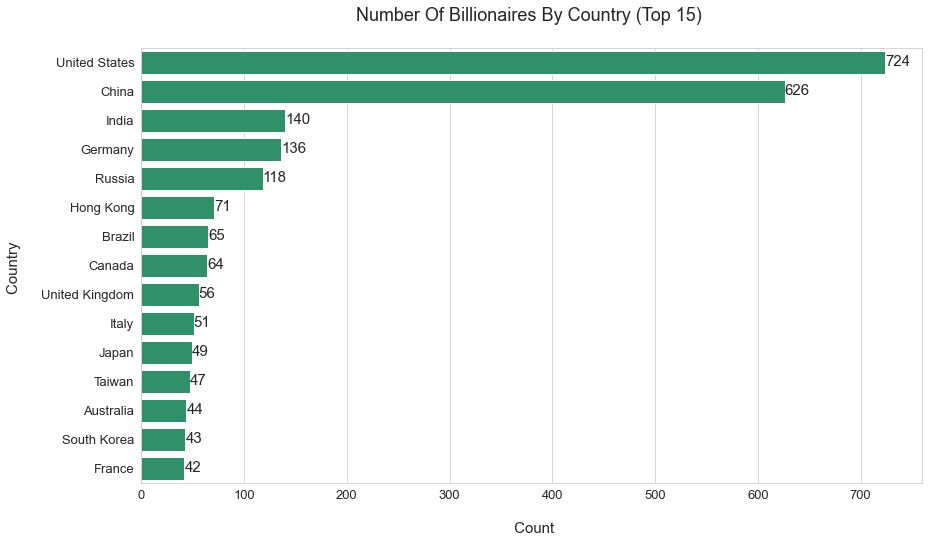

In [25]:
# Horizontal Bar Graph:
sns.set_style("whitegrid")
plt.figure(figsize=(14,8))

bar_country = sns.barplot(y = num_b_country.index, x = 'Num_Billionaires', 
                          data = num_b_country, color = "#20a06d")

plt.ylabel("Country \n", fontsize = 15)
plt.xlabel("\n Count", fontsize = 15)
plt.title("Number Of Billionaires By Country (Top 15) \n ", fontsize = 18) 
plt.yticks(size = 13)
plt.xticks(size = 13)

# Add count labels:
# Reference: https://stackoverflow.com/questions/62002434/how-to-add-data-labels-to-seaborn-barplot
bar_country.bar_label(bar_country.containers[0], fontsize = 15)

plt.show()

## Number of Billionaires By Industry Top 15 With Plot

In [26]:
## Number of Billionaires By Industry Top 15 With Plot
num_b_industry = pd.DataFrame({'Num_Billionaires' : df['Industry'].value_counts().head(15)})

In [27]:
# Finance Number 1
num_b_industry 

,Num_Billionaires
Finance & Investments,372
Technology,364
Manufacturing,331
Fashion & Retail,273
Healthcare,221
Food & Beverage,219
Real Estate,215
Diversified,188
Energy,98
Media & Entertainment,95


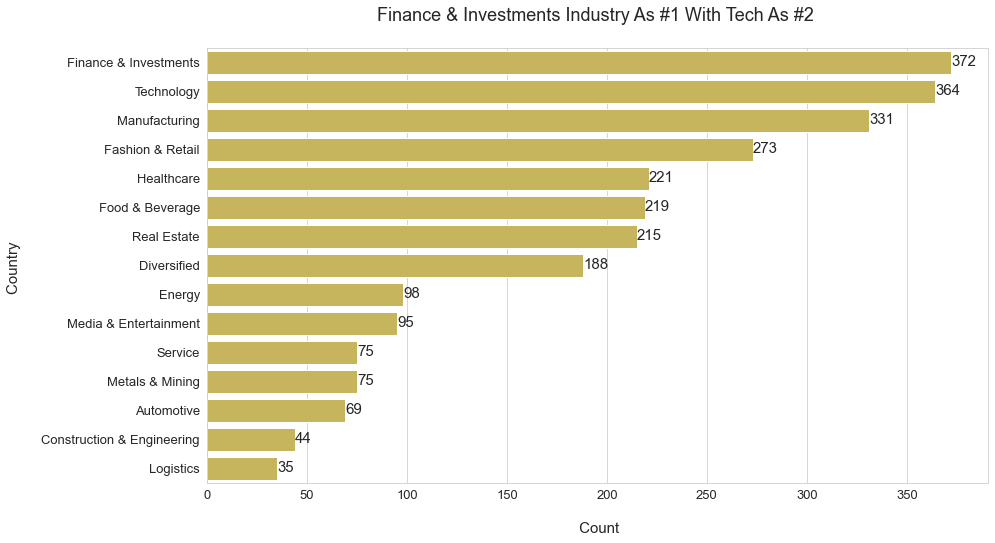

In [28]:
# Horizontal Bar Graph For Number of Billionaires By Industry:

sns.set_style("whitegrid")
plt.figure(figsize=(14,8))

bar_country = sns.barplot(y = num_b_industry.index, x = 'Num_Billionaires', 
                          data = num_b_industry, color = "#d8c14b")

plt.ylabel("Country \n", fontsize = 15)
plt.xlabel("\n Count", fontsize = 15)
plt.title("Finance & Investments Industry As #1 With Tech As #2 \n ", fontsize = 18) 
plt.yticks(size = 13)
plt.xticks(size = 13)

# Add count labels:
# Reference: https://stackoverflow.com/questions/62002434/how-to-add-data-labels-to-seaborn-barplot
bar_country.bar_label(bar_country.containers[0], fontsize = 15)

plt.show()

## Various Top 10 Lists

In [29]:
# Known Oldest Billionaires Top 10

df.sort_values('Age', ascending = False).head(10)

,Rank,Name,Net Worth Billions USD,Age,Country,Source,Industry
1611,1580,George Joseph,2.0,99.0,United States,insurance,Finance & Investments
170,171,Robert Kuok,12.6,97.0,Malaysia,"palm oil, shipping, property",Diversified
1626,1580,Charles Munger,2.0,97.0,United States,Berkshire Hathaway,Finance & Investments
1559,1517,David Murdock,2.1,97.0,United States,"Dole, real estate",Food & Beverage
1381,1362,Fong Yun Wah,2.3,96.0,Hong Kong,real estate,Real Estate
729,727,Masatoshi Ito,4.0,96.0,Japan,retail,Fashion & Retail
1579,1580,S. Daniel Abraham,2.0,96.0,United States,Slim-Fast,Food & Beverage
2273,2263,Ana Maria Brescia Cafferata,1.3,96.0,Peru,"mining, banking",Diversified
1781,1750,Stephen Jarislowsky,1.8,95.0,Canada,money management,Finance & Investments
2055,2035,John Farber,1.5,95.0,United States,chemicals,Manufacturing


In [30]:
# Youngest Billionaires Top 10
df.sort_values('Age', ascending = True).head(10)

,Rank,Name,Net Worth Billions USD,Age,Country,Source,Industry
940,925,Kevin David Lehmann,3.3,18.0,Germany,drugstores,Fashion & Retail
2143,2141,Alexandra Andresen,1.4,24.0,Norway,investments,Diversified
2122,2035,Wang Zelong,1.5,24.0,China,chemicals,Metals & Mining
2144,2141,Katharina Andresen,1.4,25.0,Norway,investments,Diversified
1338,1299,Austin Russell,2.4,26.0,United States,sensors\n★,Automotive
661,655,Gustav Magnar Witzoe,4.4,27.0,Norway,fish farming,Food & Beverage
1645,1580,Stanley Tang,2.0,28.0,United States,food delivery app,Technology
1596,1580,Andy Fang,2.0,28.0,United States,food delivery app,Technology
1328,1299,Jonathan Kwok,2.4,29.0,Hong Kong,Real Estate,Real Estate
274,274,Sam Bankman-Fried,8.7,29.0,United States,cryptocurrency,Finance & Investments


In [31]:
# USA Billionaires Top 10
df[df['Country'] == 'United States'].head(10)

,Rank,Name,Net Worth Billions USD,Age,Country,Source,Industry
0,1,Jeff Bezos,177.0,57.0,United States,Amazon,Technology
1,2,Elon Musk,151.0,49.0,United States,"Tesla, SpaceX",Automotive
3,4,Bill Gates,124.0,65.0,United States,Microsoft,Technology
4,5,Mark Zuckerberg,97.0,36.0,United States,Facebook,Technology
5,6,Warren Buffett,96.0,90.0,United States,Berkshire Hathaway,Finance & Investments
6,7,Larry Ellison,93.0,76.0,United States,software,Technology
7,8,Larry Page,91.5,48.0,United States,Google,Technology
8,9,Sergey Brin,89.0,47.0,United States,Google,Technology
13,14,Steve Ballmer,68.7,65.0,United States,Microsoft,Technology
16,17,Alice Walton,61.8,71.0,United States,Walmart,Fashion & Retail


In [32]:
# Chinese Billionaires Top 10
df[df['Country'] == 'China'].head(10)

,Rank,Name,Net Worth Billions USD,Age,Country,Source,Industry
12,13,Zhong Shanshan,68.9,66.0,China,"beverages, pharmaceuticals",Food & Beverage
14,15,Ma Huateng,65.8,49.0,China,internet media,Technology
20,21,Colin Zheng Huang,55.3,41.0,China,e-commerce,Technology
25,26,Jack Ma,48.4,56.0,China,e-commerce,Technology
34,35,Wang Wei,39.0,50.0,China,package delivery,Service
36,37,He Xiangjian,37.7,78.0,China,home appliances,Manufacturing
38,39,Zhang Yiming,35.6,37.0,China,TikTok,Technology
43,44,Qin Yinglin & family,33.5,55.0,China,pig breeding,Food & Beverage
44,45,William Lei Ding,33.0,49.0,China,online games,Technology
49,50,Yang Huiyan & family,29.6,39.0,China,real estate,Real Estate


In [33]:
# Canadian Billionaires Top 10
df[df['Country'] == 'Canada'].head(10)

,Rank,Name,Net Worth Billions USD,Age,Country,Source,Industry
32,33,David Thomson & family,41.8,63.0,Canada,media,Media & Entertainment
189,189,Joseph Tsai,11.6,57.0,Canada,e-commerce,Technology
232,232,Tobi Lutke,9.8,40.0,Canada,e-commerce,Technology
242,241,Jim Pattison,9.6,92.0,Canada,diversified,Diversified
269,269,David Cheriton,8.8,70.0,Canada,Google,Technology
285,274,Anthony von Mandl,8.7,NaN,Canada,alcoholic beverages,Food & Beverage
299,297,Pan Dong,8.3,56.0,Canada,consumer goods,Fashion & Retail
384,384,Huang Chulong,6.8,62.0,Canada,real estate,Real Estate
492,486,Emanuele (Lino) Saputo & family,5.7,84.0,Canada,cheese,Food & Beverage
581,574,Mark Scheinberg,4.9,47.0,Canada,online gambling,Gambling & Casinos


In [34]:
# Indian Billionaires Top 10
df[df['Country'] == 'India'].head(10)

,Rank,Name,Net Worth Billions USD,Age,Country,Source,Industry
9,10,Mukesh Ambani,84.5,63.0,India,diversified,Diversified
23,24,Gautam Adani & family,50.5,58.0,India,"infrastructure, commodities",Diversified
71,71,Shiv Nadar,23.5,75.0,India,software services,Technology
116,117,Radhakishan Damani,16.5,66.0,India,"retail, investments",Fashion & Retail
122,121,Uday Kotak,15.9,62.0,India,banking,Finance & Investments
133,133,Lakshmi Mittal,14.9,70.0,India,steel,Metals & Mining
167,168,Kumar Birla,12.8,53.0,India,commodities,Diversified
169,169,Cyrus Poonawalla,12.7,79.0,India,vaccines,Healthcare
203,203,Dilip Shanghvi,10.9,65.0,India,pharmaceuticals,Healthcare
213,213,Sunil Mittal & family,10.5,63.0,India,telecom,Telecom


In [35]:
# Names with family in them, top 10:
df[df['Name'].str.contains('family')].head(10)

,Rank,Name,Net Worth Billions USD,Age,Country,Source,Industry
2,3,Bernard Arnault & family,150.0,72.0,France,LVMH,Fashion & Retail
11,12,Francoise Bettencourt Meyers & family,73.6,67.0,France,L'Oréal,Fashion & Retail
15,16,Carlos Slim Helu & family,62.8,81.0,Mexico,telecom,Telecom
23,24,Gautam Adani & family,50.5,58.0,India,"infrastructure, commodities",Diversified
24,25,Phil Knight & family,49.9,83.0,United States,Nike,Fashion & Retail
27,27,Julia Koch & family,46.4,58.0,United States,Koch Industries,Diversified
30,31,Tadashi Yanai & family,44.1,72.0,Japan,fashion retail,Fashion & Retail
31,32,François Pinault & family,42.3,84.0,France,luxury goods,Fashion & Retail
32,33,David Thomson & family,41.8,63.0,Canada,media,Media & Entertainment
43,44,Qin Yinglin & family,33.5,55.0,China,pig breeding,Food & Beverage


In [36]:
# Billionaires From Major Known Corporations (Walmart, Netflix, Facebook, Amazon, Tesla, Google, Microsoft):
df[df['Source'].isin(['Walmart', 'Amazon', 'Tesla', 'Google', 'Microsoft'])]

,Rank,Name,Net Worth Billions USD,Age,Country,Source,Industry
0,1,Jeff Bezos,177.0,57.0,United States,Amazon,Technology
3,4,Bill Gates,124.0,65.0,United States,Microsoft,Technology
7,8,Larry Page,91.5,48.0,United States,Google,Technology
8,9,Sergey Brin,89.0,47.0,United States,Google,Technology
13,14,Steve Ballmer,68.7,65.0,United States,Microsoft,Technology
16,17,Alice Walton,61.8,71.0,United States,Walmart,Fashion & Retail
17,18,Jim Walton,60.2,72.0,United States,Walmart,Fashion & Retail
18,19,Rob Walton,59.5,76.0,United States,Walmart,Fashion & Retail
21,22,MacKenzie Scott,53.0,50.0,United States,Amazon,Technology
95,96,Eric Schmidt,18.9,65.0,United States,Google,Technology


In [37]:
# Technology Billionaires Top 10
df[df['Industry'] == "Technology"].head(10)

,Rank,Name,Net Worth Billions USD,Age,Country,Source,Industry
0,1,Jeff Bezos,177.0,57.0,United States,Amazon,Technology
3,4,Bill Gates,124.0,65.0,United States,Microsoft,Technology
4,5,Mark Zuckerberg,97.0,36.0,United States,Facebook,Technology
6,7,Larry Ellison,93.0,76.0,United States,software,Technology
7,8,Larry Page,91.5,48.0,United States,Google,Technology
8,9,Sergey Brin,89.0,47.0,United States,Google,Technology
13,14,Steve Ballmer,68.7,65.0,United States,Microsoft,Technology
14,15,Ma Huateng,65.8,49.0,China,internet media,Technology
20,21,Colin Zheng Huang,55.3,41.0,China,e-commerce,Technology
21,22,MacKenzie Scott,53.0,50.0,United States,Amazon,Technology


In [38]:
# Retail Billionaires Top 10
df[df['Industry'] == "Fashion & Retail"].head(10)

,Rank,Name,Net Worth Billions USD,Age,Country,Source,Industry
2,3,Bernard Arnault & family,150.0,72.0,France,LVMH,Fashion & Retail
10,11,Amancio Ortega,77.0,85.0,Spain,Zara,Fashion & Retail
11,12,Francoise Bettencourt Meyers & family,73.6,67.0,France,L'Oréal,Fashion & Retail
16,17,Alice Walton,61.8,71.0,United States,Walmart,Fashion & Retail
17,18,Jim Walton,60.2,72.0,United States,Walmart,Fashion & Retail
18,19,Rob Walton,59.5,76.0,United States,Walmart,Fashion & Retail
24,25,Phil Knight & family,49.9,83.0,United States,Nike,Fashion & Retail
30,31,Tadashi Yanai & family,44.1,72.0,Japan,fashion retail,Fashion & Retail
31,32,François Pinault & family,42.3,84.0,France,luxury goods,Fashion & Retail
33,34,Beate Heister & Karl Albrecht Jr.,39.2,NaN,Germany,supermarkets,Fashion & Retail


In [39]:
# Finance Billionaires Top 10
df[df['Industry'].str.contains("Finance")].head(10)

,Rank,Name,Net Worth Billions USD,Age,Country,Source,Industry
5,6,Warren Buffett,96.0,90.0,United States,Berkshire Hathaway,Finance & Investments
22,23,Daniel Gilbert,51.9,59.0,United States,Quicken Loans,Finance & Investments
64,65,Thomas Peterffy,25.0,76.0,United States,discount brokerage,Finance & Investments
67,68,Jim Simons,24.6,82.0,United States,hedge funds,Finance & Investments
78,79,Stephen Schwarzman,21.9,74.0,United States,investments,Finance & Investments
84,85,Abigail Johnson,20.9,59.0,United States,money management,Finance & Investments
85,86,R. Budi Hartono,20.5,80.0,Indonesia,"banking, tobacco",Finance & Investments
87,88,Ray Dalio,20.3,71.0,United States,hedge funds,Finance & Investments
109,110,Petr Kellner,17.5,56.0,Czechia,"finance, telecommunications",Finance & Investments
118,119,Steve Cohen,16.0,64.0,United States,hedge funds,Finance & Investments


In [40]:
# Crypto Billionaires Top 10
df[df['Source'].str.contains("crypto")].head(10)

,Rank,Name,Net Worth Billions USD,Age,Country,Source,Industry
274,274,Sam Bankman-Fried,8.7,29.0,United States,cryptocurrency,Finance & Investments
403,404,Brian Armstrong,6.5,38.0,United States,cryptocurrency,Finance & Investments
903,891,Chris Larsen,3.4,60.0,United States,cryptocurrency,Finance & Investments
1057,1008,Cameron Winklevoss,3.0,39.0,United States,cryptocurrency,Finance & Investments
1058,1008,Tyler Winklevoss,3.0,39.0,United States,cryptocurrency,Finance & Investments
1421,1362,Michael Saylor,2.3,56.0,United States,cryptocurrency,Technology
1622,1580,Jed McCaleb,2.0,46.0,United States,cryptocurrency,Finance & Investments
1682,1664,Fred Ehrsam,1.9,32.0,United States,cryptocurrency exchange,Finance & Investments
1745,1664,Changpeng Zhao,1.9,45.0,China,cryptocurrency exchange,Finance & Investments
2004,1931,Barry Silbert,1.6,44.0,United States,cryptocurrency,Finance & Investments
